In [14]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv('https://talentcocomedia.s3.amazonaws.com/ml-assets/heart-disease.csv')

In [16]:
y = df['target']

In [17]:
x = df.drop('target',axis=1)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [19]:
df.shape

(303, 14)

In [20]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv('https://talentcocomedia.s3.amazonaws.com/ml-assets/heart-disease.csv')

In [22]:
y = df['target']

In [23]:
x = df.drop('target',axis=1)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [25]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(penalty='l2')

val = list(np.arange(1, 10, 1))

parameters = {'solver':('newton-cg', 'liblinear', 'sag', 'saga'), 'C':val}

clf_lr = GridSearchCV(lr_model, parameters)
clf_lr.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'solver': ('newton-cg', 'liblinear', 'sag', 'saga')})

In [26]:
print(clf_lr.best_params_)

{'C': 1, 'solver': 'liblinear'}


In [27]:
test_pred = clf_lr.predict(x_test)

In [28]:
acc_lr_gs = accuracy_score(test_pred,y_test)
acc_lr_gs

0.8461538461538461

In [29]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()

val = list(np.arange(1,30, 1))

parameters = {'n_neighbors':val}

clf_knn = GridSearchCV(neigh, parameters)
clf_knn.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]})

In [30]:
print(clf_knn.best_params_)

{'n_neighbors': 28}


In [31]:
test_pred_knn = clf_knn.predict(x_test)

In [32]:
accuracy_knn_gs = accuracy_score(test_pred_knn, y_test)
accuracy_knn_gs

0.6263736263736264

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [34]:
clf = DecisionTreeClassifier(random_state=1024)

param_grid = {
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : np.arange(5,10,1),
              'criterion' :['gini', 'entropy']
             }

clf_dtc = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=True)

clf_dtc.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [35]:
print(clf_dtc.best_params_)

{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}


In [36]:
test_pred_dtc = clf_dtc.predict(x_test)

In [37]:
accuracy_dtc_gs = metrics.accuracy_score(y_test, test_pred_dtc)
accuracy_dtc_gs

0.8791208791208791

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)

array([[31,  4],
       [10, 46]])

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        41
           1       0.82      0.92      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.84        91



In [40]:
confusion_matrix(test_pred_knn,y_test)

array([[23, 16],
       [18, 34]])

In [41]:
print(classification_report(y_test,test_pred_knn))

              precision    recall  f1-score   support

           0       0.59      0.56      0.57        41
           1       0.65      0.68      0.67        50

    accuracy                           0.63        91
   macro avg       0.62      0.62      0.62        91
weighted avg       0.62      0.63      0.63        91



In [42]:
confusion_matrix(test_pred_dtc,y_test)

array([[32,  2],
       [ 9, 48]])

In [43]:
print(classification_report(y_test,test_pred_dtc))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85        41
           1       0.84      0.96      0.90        50

    accuracy                           0.88        91
   macro avg       0.89      0.87      0.88        91
weighted avg       0.89      0.88      0.88        91



In [44]:
prob_lr = clf_lr.predict_proba(x_test)
prob_knn = clf_knn.predict_proba(x_test)
prob_dtc = clf_dtc.predict_proba(x_test)

In [45]:
#keeping only the 2nd column (positive values) and discarding the 1st column (negative values)
prob_lr =  prob_lr[:, 1]
prob_knn = prob_knn[:, 1]
prob_dtc = prob_dtc[:, 1]

In [46]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, prob_lr)
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, prob_knn)
fpr_dtc, tpr_dtc, thresh_dtc = roc_curve(y_test, prob_dtc)

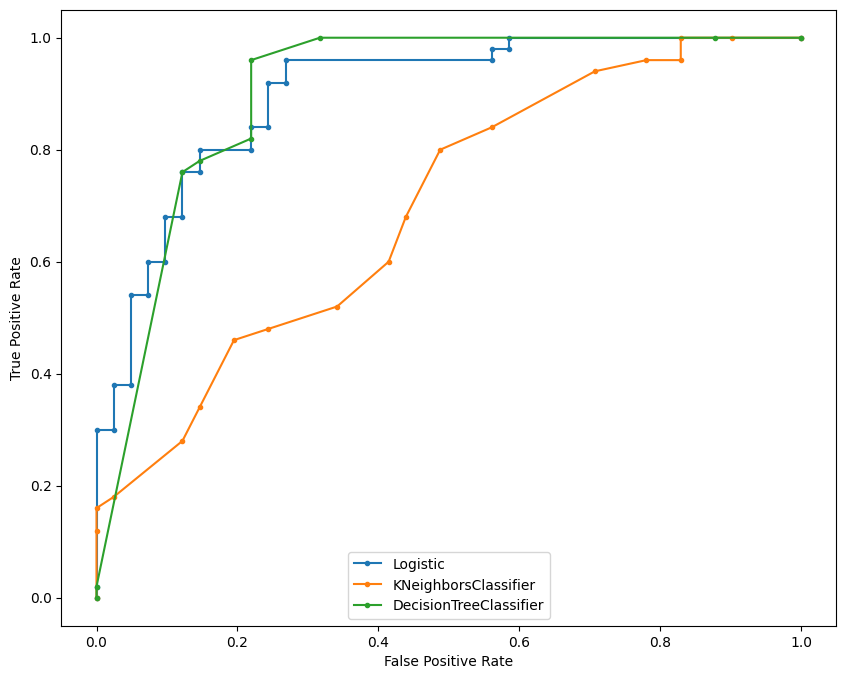

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(fpr_lr, tpr_lr, marker='.', label='Logistic')
ax.plot(fpr_knn, tpr_knn, marker='.', label='KNeighborsClassifier')
ax.plot(fpr_dtc, tpr_dtc, marker='.', label='DecisionTreeClassifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=8)

plt.show()

In [48]:
from sklearn.metrics import roc_auc_score

auc_lr = roc_auc_score(y_test, prob_lr)
auc_knn = roc_auc_score(y_test, prob_knn)
auc_dtc = roc_auc_score(y_test, prob_dtc)

print(f'Logistic : ROC AUC = {round(auc_lr, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_knn, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_dtc, 3)*100} %')

Logistic : ROC AUC = 90.0 %
Logistic : ROC AUC = 69.5 %
Logistic : ROC AUC = 90.3 %


In [49]:
#from pandas.core.window.expanding import ExpandingGroupby
#from matplotlib.projections.polar import ThetaAxis
#n = int(input("Enter no of Patients who's Status is to be Determined :- "))

#def Prediction() :
  #age = int(input("Age of the Patient :- "))
  #sex = int(input("Sex of the Patient (0 - female & 1 - male) :- "))
  #cp = int(input("Chest Pain Type :- "))
  #trestbps = int(input("Resting Blood Pressure :- "))
  #chol = int(input("Serum Cholestrol :- "))
  #fbs = int(input("Fasting Blood Sugar :- "))
  #restecg = int(input("Resting ElectroCardiographic Result :- "))
  #thalach = int(input("Maximum Heart Rate Achieved :- "))
  #exang = int(input("Exercise-include angina (1 - True, 0 - False) :- "))
  #oldpeak = float(input("ST Depression induced by Exercise relative to Rest :- "))
  #slope = int(input("Slope of Peak Exercise ST segment :- "))
  #ca = int(input("No. of Major Vessels (0-3) :- "))
  #thal = int(input("Thalasemia Indicator :- "))
  #new_patient = np.array([age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal])

  #new_patient = new_patient.reshape(1,-1) #converting to 2D array

  #if clf_lr.predict(new_patient) == 0 :
   # return "The Patient with the above provided Vitals Dies!!!"
  #else :
   # return "The Patient with the above provided vitals Lives!!!"

#for i in range(n) :
 # print(Prediction())